# 📘 Projekt: Vorhersage der Mohs-Härte von Materialien
🔍 Einleitung
Im Rahmen dieses Machine-Learning-Projekts wird ein Regressionsmodell entwickelt, das die Mohs-Härte (eine Skala zur Bestimmung der Härte von Materialien) auf Basis verschiedener chemischer und physikalischer Merkmale vorhersagen soll.

Die Daten stammen aus einem Kaggle-Wettbewerb und beinhalten für jede Probe diverse aggregierte Merkmale wie Atomgewicht, Elektronenzahl, Dichte, Ionisierungsenergie und weitere. Ziel ist es, die numerische Zielgröße Hardness so genau wie möglich vorherzusagen.

##🎯 Ziel des Projekts
Entwicklung eines Regressionsmodells zur Vorhersage der Mohs-Härte (Hardness)

Bewertung der Modellleistung anhand geeigneter Regressionsmetriken wie MAE, RMSE und R²

Erstellung einer gültigen Kaggle-Submission im vorgegebenen Format (id, Hardness)

Optional: Visualisierung der Ergebnisse, Feature-Analyse oder Deployment über Streamlit/Hugging Face

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dateien laden
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
# Überblick verschaffen
print("Train-Shape:", train.shape)
print("Test-Shape:", test.shape)
display(train.head())
display(train.info())

Train-Shape: (10407, 13)
Test-Shape: (6939, 12)


,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


None

In [3]:
print(train.columns.tolist())


['id', 'allelectrons_Total', 'density_Total', 'allelectrons_Average', 'val_e_Average', 'atomicweight_Average', 'ionenergy_Average', 'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average', 'zaratio_Average', 'density_Average', 'Hardness']


el_neg_chi_Average       0.290352
ionenergy_Average        0.203203
val_e_Average            0.161715
zaratio_Average          0.055248
id                      -0.006989
R_vdw_element_Average   -0.061402
allelectrons_Total      -0.061687
density_Total           -0.161524
R_cov_element_Average   -0.189111
density_Average         -0.360780
allelectrons_Average    -0.400496
atomicweight_Average    -0.402948
Name: Hardness, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24800\3709297324.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values[:10], y=corr_with_target.index[:10], palette="viridis")


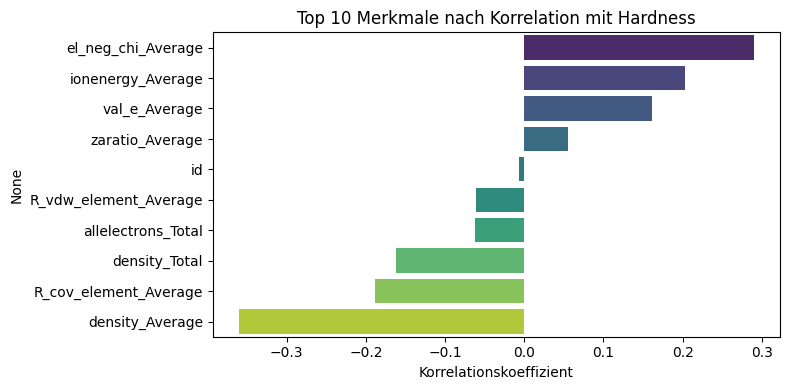

In [4]:
# Nur numerische Spalten
numerics = train.select_dtypes(include="number")

# Korrelationen berechnen
correlations = numerics.corr()

# Nur Korrelation mit Zielvariable anzeigen
corr_with_target = correlations["Hardness"].drop("Hardness").sort_values(ascending=False)
print(corr_with_target)

# Optional: Top 10 als Diagramm
plt.figure(figsize=(8, 4))
sns.barplot(x=corr_with_target.values[:10], y=corr_with_target.index[:10], palette="viridis")
plt.title("Top 10 Merkmale nach Korrelation mit Hardness")
plt.xlabel("Korrelationskoeffizient")
plt.tight_layout()
plt.show()


In [5]:
# Statistische Übersicht
train.describe().T


,count,mean,std,min,25%,50%,75%,max
id,10407.0,5203.000000,3004.386460,0.0,2601.500000,5203.000000,7804.500000,10406.000000
allelectrons_Total,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000
density_Total,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804
allelectrons_Average,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000
atomicweight_Average,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810
el_neg_chi_Average,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000
R_cov_element_Average,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840


<Axes: xlabel='Hardness', ylabel='Count'>

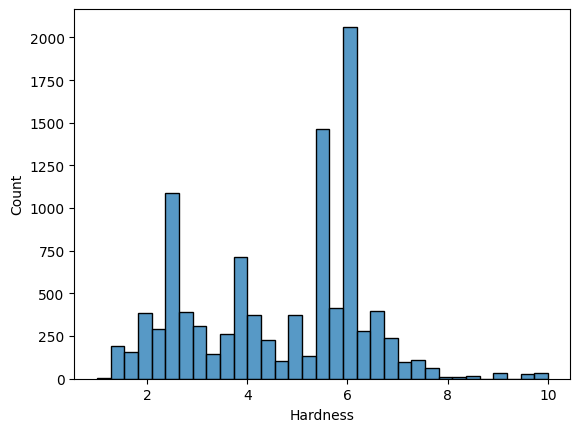

In [6]:
sns.histplot(train,x='Hardness')

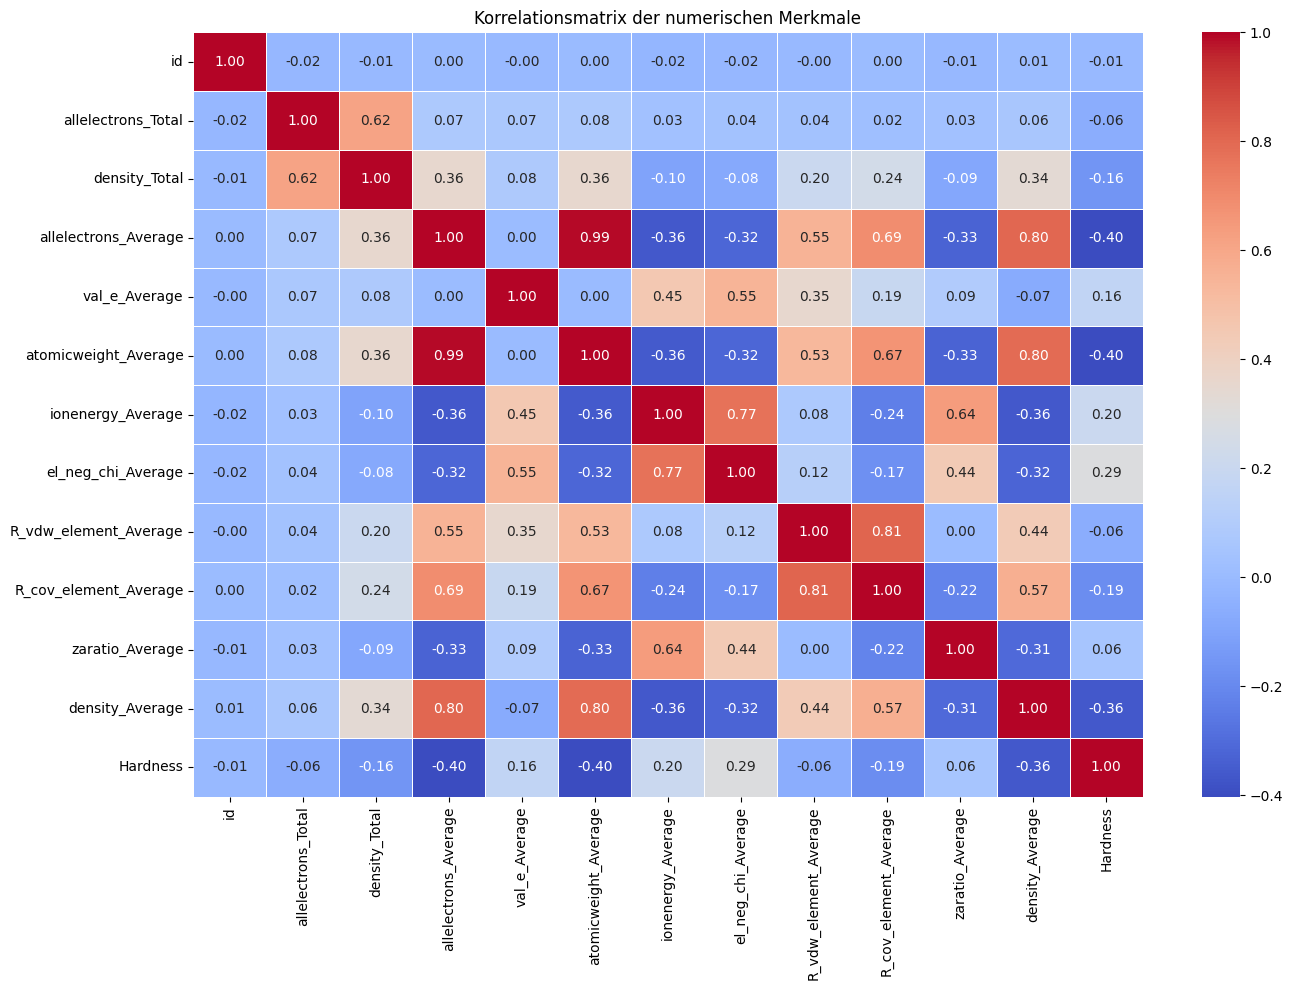

In [7]:
# Korrelationsmatrix berechnen
correlation_matrix = train.corr(numeric_only=True)

# Heatmap darstellen
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Korrelationsmatrix der numerischen Merkmale")
plt.tight_layout()
plt.show()


<Axes: xlabel='density_Total'>

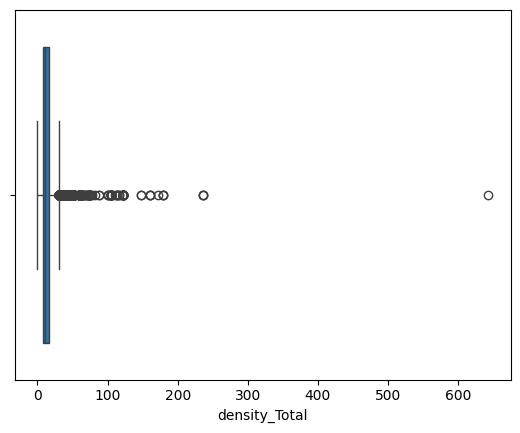

In [8]:
sns.boxplot(train,x='density_Total')

<Axes: xlabel='Hardness'>

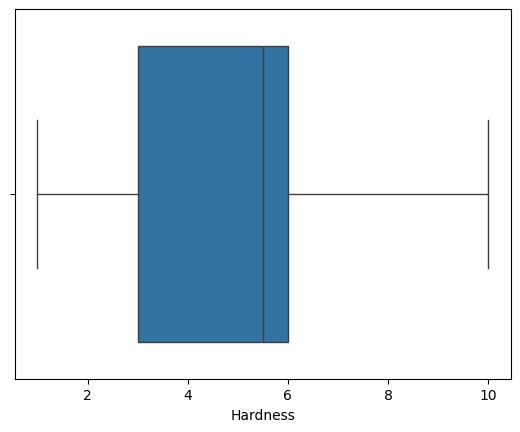

In [9]:
sns.boxplot(train,x='Hardness')

#mit diesen leider nur 40%
outliers = train.quantile(q=0.97, numeric_only=True)
for col in outliers.index:
    train = train[train[col] < outliers[col]]

In [10]:
x = train.drop(columns=["id", "Hardness"])
y = train["Hardness"]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
 
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
 
from sklearn.neural_network import MLPRegressor
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
 
def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()
 
       
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        x=MinMaxScaler().fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        r_squared= []
        rmse= []
        mae= []
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))

 
        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [12]:
# Algo-Vergleich starten
result_table = algo_test(x, y)
display(result_table)

,R_Squared,RMSE,MAE
Gradient Boosting,0.447725,1.225203,0.923396
XGBRegressor,0.414161,1.261885,0.928162
mlp_regressor,0.362162,1.316697,1.007251
KNeighborsRegressor,0.327759,1.351739,1.088038
AdaBoost,0.299466,1.379892,1.023559
SVR,0.299443,1.379914,1.006464
Ridge,0.226313,1.450151,1.173114
Linear,0.225372,1.451032,1.172016
SGD,0.207193,1.467960,1.220362
Lasso,-0.000084,1.648727,1.468926


In [13]:
# Mit Farben hervorheben (größerer R² = besser)
styled_result = result_table.style.background_gradient(cmap="YlGnBu").format("{:.4f}")
styled_result


,R_Squared,RMSE,MAE
Gradient Boosting,0.4477,1.2252,0.9234
XGBRegressor,0.4142,1.2619,0.9282
mlp_regressor,0.3622,1.3167,1.0073
KNeighborsRegressor,0.3278,1.3517,1.0880
AdaBoost,0.2995,1.3799,1.0236
SVR,0.2994,1.3799,1.0065
Ridge,0.2263,1.4502,1.1731
Linear,0.2254,1.4510,1.1720
SGD,0.2072,1.4680,1.2204
Lasso,-0.0001,1.6487,1.4689


In [16]:
# Bestes Modell trainieren (hier GradientBoosting)
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(x, y)

# Testdaten vorbereiten
X_test = test.drop(columns=["id"])
 # falls du skaliert hast – sonst weglassen

# Vorhersagen
predictions = model.predict(X_test)

# Submission-Datei erstellen
submission = pd.DataFrame({
    "id": test["id"],
    "Hardness": predictions
})

submission.to_csv("submission.csv", index=False)


In [17]:
import joblib

# Speichern des Modells
joblib.dump(model, "gradient_boosting_model.pkl")


['gradient_boosting_model.pkl']

In [18]:
from catboost import CatBoostRegressor
import joblib

# Modell definieren
model = CatBoostRegressor(verbose=0, random_state=42)

# Modell trainieren
model.fit(x, y)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Vorhersagen auf dem Trainingsset (optional: auch train_test_split möglich)
y_pred = model.predict(x)

# Auswerten
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Ausgabe
print("CatBoost-Regressor Performance auf Trainingsdaten:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")



CatBoost-Regressor Performance auf Trainingsdaten:
MAE:  0.6980
RMSE: 0.9464
R²:   0.6828


In [22]:
import pandas as pd

# Nur numerische Spalten angeben fürs Formatieren
scores = pd.DataFrame({
    "Modell": ["CatBoost"],
    "MAE": [mae],
    "RMSE": [rmse],
    "R²": [r2]
})

# Anzeigen mit Farbverlauf NUR für MAE, RMSE und R²
display(scores.style.background_gradient(cmap="YlGnBu", subset=["MAE", "RMSE", "R²"]).format({
    "MAE": "{:.4f}",
    "RMSE": "{:.4f}",
    "R²": "{:.4f}"
}))


,Modell,MAE,RMSE,R²
0,CatBoost,0.6980,0.9464,0.6828


In [23]:
# Modell speichern
joblib.dump(model, "catboost_model.pkl")
print("Modell gespeichert als 'catboost_model.pkl'")

Modell gespeichert als 'catboost_model.pkl'


In [24]:
CatBoostRegressor(iterations=1000, learning_rate=0.03, depth=6, l2_leaf_reg=3)


In [28]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(x, y)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2482
[LightGBM] [Info] Number of data points in the train set: 10407, number of used features: 11
[LightGBM] [Info] Start training from score 4.647126


LGBMRegressor(random_state=42)

In [29]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(x, y)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [34]:
from sklearn.model_selection import train_test_split

# Datensatz aufteilen
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [35]:
model.fit(x_train, y_train)
lgbm_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 8325, number of used features: 11
[LightGBM] [Info] Start training from score 4.650150


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [36]:
cat_preds = model.predict(X_test)
lgb_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

ensemble_preds = (cat_preds + lgb_preds + xgb_preds) / 3


In [37]:
cat_preds = model.predict(x_test)
lgb_preds = lgbm_model.predict(x_test)
xgb_preds = xgb_model.predict(x_test)

ensemble_preds = (cat_preds + lgb_preds + xgb_preds) / 3

# Evaluation
mae = mean_absolute_error(y_test, ensemble_preds)
rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
r2 = r2_score(y_test, ensemble_preds)

print("📊 Ensemble-Modell Performance:")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


📊 Ensemble-Modell Performance:
MAE:  0.8963
RMSE: 1.2068
R²:   0.4642


In [38]:
# Evaluation auf Testdaten
mae = mean_absolute_error(y_test, ensemble_preds)
rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))
r2 = r2_score(y_test, ensemble_preds)

# Ergebnisse in DataFrame
ensemble_scores = pd.DataFrame({
    "Modell": ["Ensemble (CatBoost + LGBM + XGB)"],
    "MAE": [mae],
    "RMSE": [rmse],
    "R²": [r2]
})

# Schön anzeigen
display(ensemble_scores.style.background_gradient(cmap="YlGnBu").format({
    "MAE": "{:.4f}",
    "RMSE": "{:.4f}",
    "R²": "{:.4f}"
}))



,Modell,MAE,RMSE,R²
0,Ensemble (CatBoost + LGBM + XGB),0.8963,1.2068,0.4642


In [40]:
import joblib

# Speichern der Einzelmodelle
joblib.dump(model, "catboost_model.pkl")
joblib.dump(lgbm_model, "lightgbm_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")

print("✅ Modelle gespeichert als .pkl")


✅ Modelle gespeichert als .pkl


In [41]:
# Vorhersagen auf dem originalen Testset
cat_preds = model.predict(X_test)
lgb_preds = lgbm_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

ensemble_preds = (cat_preds + lgb_preds + xgb_preds) / 3

# Submission-Datei erstellen
submission = pd.DataFrame({
    "id": test["id"],
    "Hardness": ensemble_preds
})

submission.to_csv("submission_ensemble.csv", index=False)
print("📁 Submission gespeichert als 'submission_ensemble.csv'")


📁 Submission gespeichert als 'submission_ensemble.csv'


In [48]:
# Ensemble-Modell Klasse
class SimpleAveragingEnsemble:
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        preds = [model.predict(X) for model in self.models]
        return sum(preds) / len(preds)


In [49]:
import joblib

# Modelle laden
cat = joblib.load("catboost_model.pkl")
lgb = joblib.load("lightgbm_model.pkl")
xgb = joblib.load("xgboost_model.pkl")

# Ensemble erstellen
ensemble = SimpleAveragingEnsemble([cat, lgb, xgb])



In [50]:
# Ensemble speichern
joblib.dump(ensemble, "ensemble_model.pkl")
print("✅ Ensemble-Modell gespeichert als 'ensemble_model.pkl'")

✅ Ensemble-Modell gespeichert als 'ensemble_model.pkl'
